<a href="https://colab.research.google.com/github/sydoky/mobile-customer-churn/blob/main/mobile_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mobile Customer Churn**
In this Portfolio task you will work with some (fake but realistic) data on Mobile Customer Churn. Churn is where a customer leaves the mobile provider. The goal is to build a simple predictive model to predict churn from available features.

The data was generated (by Hume Winzar at Macquarie) based on a real dataset provided by Optus. The data is simulated but the column headings are the same. (Note that I'm not sure if all of the real relationships in this data are preserved so you need to be cautious in interpreting the results of your analysis here).

The data is provided in file MobileCustomerChurn.csv and column headings are defined in a file MobileChurnDataDictionary.csv (store these in the files folder in your project).

Your high level goal in this notebook is to try to build and evaluate a predictive model for churn - predict the value of the CHURN_IND field in the data from some of the other fields. Note that the three RECON fields should not be used as they indicate whether the customer reconnected after having churned


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df=pd.read_csv("/content/MobileCustomerChurn.csv")

In [3]:
df

,INDEX,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,RECON_SMS_NEXT_MTH,RECON_TELE_NEXT_MTH,RECON_EMAIL_NEXT_MTH
0,1,1,46,1,30,CONSUMER,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA,NaN,NaN,NaN
1,2,2,60,3,55,CONSUMER,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW,NaN,NaN,NaN
2,3,5,65,1,29,CONSUMER,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA,NaN,NaN,NaN
3,4,6,31,1,51,CONSUMER,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC,NaN,NaN,NaN
4,5,8,95,1,31,CONSUMER,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46201,46202,79494,10,1,61,CONSUMER,9,27.27,BYO,7,0,0,NO-CONTRACT,0,OTHER,0,27.27,COUNTRY,VIC,0.0,1.0,0.0
46202,46203,79495,2,1,53,CONSUMER,2,54.54,NON BYO,2,0,24,OFF-CONTRACT,24,UNKNOWN,1,54.99,METRO,NSW,NaN,NaN,NaN
46203,46204,79496,47,1,22,CONSUMER,47,72.72,NON BYO,7,17,24,ON-CONTRACT,24,APPLE,0,72.72,COUNTRY,NSW,0.0,0.0,0.0
46204,46205,79497,94,1,40,CONSUMER,182,17.27,NON BYO,4,0,24,OFF-CONTRACT,24,APPLE,0,17.27,METRO,VIC,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46206 entries, 0 to 46205
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   INDEX                         46206 non-null  int64  
 1   CUST_ID                       46206 non-null  int64  
 2   ACCOUNT_TENURE                46206 non-null  int64  
 3   ACCT_CNT_SERVICES             46206 non-null  int64  
 4   AGE                           46206 non-null  object 
 5   CFU                           46206 non-null  object 
 6   SERVICE_TENURE                46206 non-null  int64  
 7   PLAN_ACCESS_FEE               46206 non-null  float64
 8   BYO_PLAN_STATUS               46206 non-null  object 
 9   PLAN_TENURE                   46206 non-null  int64  
 10  MONTHS_OF_CONTRACT_REMAINING  46206 non-null  int64  
 11  LAST_FX_CONTRACT_DURATION     46206 non-null  int64  
 12  CONTRACT_STATUS               46206 non-null  object 
 13  P

In [5]:
#this cell works, but columns are removed already. I can run it once 
df=df.drop("RECON_SMS_NEXT_MTH", axis=1)
df=df.drop("RECON_TELE_NEXT_MTH", axis=1)
df=df.drop("RECON_EMAIL_NEXT_MTH", axis=1)
df=df.drop("INDEX", axis=1)
df=df.dropt("CUST_ID", axis=1)



AttributeError: ignored

In [6]:
df

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE
0,1,46,1,30,CONSUMER,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA
1,2,60,3,55,CONSUMER,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW
2,5,65,1,29,CONSUMER,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA
3,6,31,1,51,CONSUMER,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC
4,8,95,1,31,CONSUMER,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46201,79494,10,1,61,CONSUMER,9,27.27,BYO,7,0,0,NO-CONTRACT,0,OTHER,0,27.27,COUNTRY,VIC
46202,79495,2,1,53,CONSUMER,2,54.54,NON BYO,2,0,24,OFF-CONTRACT,24,UNKNOWN,1,54.99,METRO,NSW
46203,79496,47,1,22,CONSUMER,47,72.72,NON BYO,7,17,24,ON-CONTRACT,24,APPLE,0,72.72,COUNTRY,NSW
46204,79497,94,1,40,CONSUMER,182,17.27,NON BYO,4,0,24,OFF-CONTRACT,24,APPLE,0,17.27,METRO,VIC


# Predict which customers leaving and which not

In [7]:
df.shape

(46206, 18)

In [8]:
df.head(7)

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE
0,1,46,1,30,CONSUMER,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA
1,2,60,3,55,CONSUMER,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW
2,5,65,1,29,CONSUMER,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA
3,6,31,1,51,CONSUMER,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC
4,8,95,1,31,CONSUMER,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW
5,9,62,2,25,CONSUMER,62,90.90,NON BYO,8,13,24,ON-CONTRACT,24,APPLE,1,250.46,COUNTRY,VIC
6,10,90,1,35,CONSUMER,90,71.81,NON BYO,63,0,24,OFF-CONTRACT,24,APPLE,1,71.81,METRO,NSW


In [9]:
#Next step is splitting in x and y
X=df.drop("CHURN_IND", axis=1)
y=df["CHURN_IND"]

In [10]:
df.CHURN_IND.value_counts()

0    28416
1    17790
Name: CHURN_IND, dtype: int64

In [11]:

df.CHURN_IND.value_counts(normalize=True)

0    0.614985
1    0.385015
Name: CHURN_IND, dtype: float64

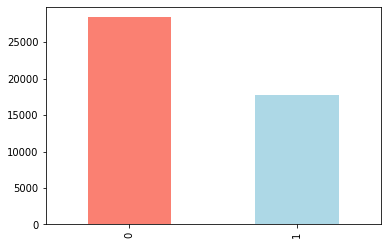

In [12]:
df.CHURN_IND.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [13]:
y

0        1
1        1
2        1
3        1
4        1
        ..
46201    0
46202    1
46203    0
46204    0
46205    0
Name: CHURN_IND, Length: 46206, dtype: int64

In [14]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [15]:
len(X), len(X_train)

(46206, 36964)

In [16]:
pd.crosstab(df.AGE, df.CHURN_IND)

CHURN_IND,0,1
AGE,,
#VALUE!,49,27
-4,1,1
104,1,0
105,1,1
109,2,0
...,...,...
92,2,4
93,3,2
94,2,0


In [17]:
pd.crosstab(df.CHURN_IND,df.AGE)

AGE,#VALUE!,-4,104,105,109,113,114,115,116,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,...,58,59,60,61,62,63,64,65,66,67,68,69,7,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,97
CHURN_IND,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,49,1,1,1,2,0,1,18,16,1,124,2,156,345,426,504,581,629,681,721,697,675,620,614,653,596,637,609,592,557,540,522,557,546,597,615,608,627,639,616,...,450,424,400,347,342,340,283,293,267,248,222,204,1,184,137,125,112,89,88,75,69,55,50,47,27,34,23,21,6,16,10,8,8,9,2,2,3,2,1,1
1,27,1,0,1,0,1,0,7,11,1,54,1,212,418,502,506,518,565,565,579,549,531,531,467,443,409,416,421,378,364,370,340,342,327,350,358,327,372,358,373,...,205,186,166,149,183,137,117,135,117,130,101,85,0,69,84,66,42,48,27,29,29,34,21,9,16,9,12,8,20,8,7,8,1,4,5,4,2,0,2,0


In [18]:
df.isna().sum()

CUST_ID                         0
ACCOUNT_TENURE                  0
ACCT_CNT_SERVICES               0
AGE                             0
CFU                             0
SERVICE_TENURE                  0
PLAN_ACCESS_FEE                 0
BYO_PLAN_STATUS                 0
PLAN_TENURE                     0
MONTHS_OF_CONTRACT_REMAINING    0
LAST_FX_CONTRACT_DURATION       0
CONTRACT_STATUS                 0
PREV_CONTRACT_DURATION          0
HANDSET_USED_BRAND              0
CHURN_IND                       0
MONTHLY_SPEND                   0
COUNTRY_METRO_REGION            1
STATE                           1
dtype: int64

In [19]:
#for numeric 
for label, content in df.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

CUST_ID
ACCOUNT_TENURE
ACCT_CNT_SERVICES
SERVICE_TENURE
PLAN_ACCESS_FEE
PLAN_TENURE
MONTHS_OF_CONTRACT_REMAINING
LAST_FX_CONTRACT_DURATION
PREV_CONTRACT_DURATION
CHURN_IND
MONTHLY_SPEND


In [20]:
#for string
for label, content in df.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

AGE
CFU
BYO_PLAN_STATUS
CONTRACT_STATUS
HANDSET_USED_BRAND
COUNTRY_METRO_REGION
STATE


In [21]:
#string into numbers 


In [22]:
#find how many nan in my numeric columns are
for label, content in df.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)
#print nothing because we don't have any nan values in this example

In [23]:
#now we are filling for the missing row which have "#VALUE!"

df.replace("#VALUE!",58,inplace=True)

#we are just using a random number of 58. It doesn't mean anything


In [24]:
X=df.drop("CHURN_IND", axis=1)
y=df["CHURN_IND"]

In [25]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [26]:
df

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE
0,1,46,1,30,CONSUMER,46,54.54,NON BYO,15,0,24,OFF-CONTRACT,24,SAMSUNG,1,61.40,COUNTRY,WA
1,2,60,3,55,CONSUMER,59,54.54,NON BYO,5,0,24,OFF-CONTRACT,24,APPLE,1,54.54,METRO,NSW
2,5,65,1,29,CONSUMER,65,40.90,BYO,15,0,12,OFF-CONTRACT,12,APPLE,1,2.50,COUNTRY,WA
3,6,31,1,51,CONSUMER,31,31.81,NON BYO,31,0,24,OFF-CONTRACT,24,APPLE,1,6.48,COUNTRY,VIC
4,8,95,1,31,CONSUMER,95,54.54,NON BYO,0,0,24,OFF-CONTRACT,24,APPLE,1,100.22,METRO,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46201,79494,10,1,61,CONSUMER,9,27.27,BYO,7,0,0,NO-CONTRACT,0,OTHER,0,27.27,COUNTRY,VIC
46202,79495,2,1,53,CONSUMER,2,54.54,NON BYO,2,0,24,OFF-CONTRACT,24,UNKNOWN,1,54.99,METRO,NSW
46203,79496,47,1,22,CONSUMER,47,72.72,NON BYO,7,17,24,ON-CONTRACT,24,APPLE,0,72.72,COUNTRY,NSW
46204,79497,94,1,40,CONSUMER,182,17.27,NON BYO,4,0,24,OFF-CONTRACT,24,APPLE,0,17.27,METRO,VIC


In [27]:
pd.crosstab(df.AGE,df.CHURN_IND)
#Now the #VALUE! is removed. Now we have to remove -4

CHURN_IND,0,1
AGE,,
58,49,27
-4,1,1
104,1,0
105,1,1
109,2,0
...,...,...
92,2,4
93,3,2
94,2,0


In [28]:
df.replace(-4,78,inplace=True)

In [29]:
#we ignore -1. it doesn't affect our model 
pd.crosstab(df.AGE,df.CHURN_IND)

CHURN_IND,0,1
AGE,,
58,49,27
-4,1,1
104,1,0
105,1,1
109,2,0
...,...,...
92,2,4
93,3,2
94,2,0


In [30]:
#Here where my pain started. I had to convert strings into numbers. I wrote this cell but I had to do below cells for conversion 
#Applying models
models={"KNN":KNeighborsClassifier(),
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(),
        "Linear SVC": LinearSVC()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)
  model_scores = {}

  for name, model in models.items():
    model.fit(X_train, y_train)

    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [31]:
#conversion part 1
#Converting strings into numbers 
for label, content in df.items():
  if not pd.api.types.is_numeric_dtype(content):
    df[label+"_is_missing"]=pd.isnull(content)
    df[label]=pd.Categorical(content).codes+1

In [32]:
df

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,CHURN_IND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE,AGE_is_missing,CFU_is_missing,BYO_PLAN_STATUS_is_missing,CONTRACT_STATUS_is_missing,HANDSET_USED_BRAND_is_missing,COUNTRY_METRO_REGION_is_missing,STATE_is_missing
0,1,46,1,25,1,46,54.54,2,15,0,24,2,24,5,1,61.40,1,8,False,False,False,False,False,False,False
1,2,60,3,51,1,59,54.54,2,5,0,24,2,24,1,1,54.54,2,2,False,False,False,False,False,False,False
2,5,65,1,24,1,65,40.90,1,15,0,12,2,12,1,1,2.50,1,8,False,False,False,False,False,False,False
3,6,31,1,47,1,31,31.81,2,31,0,24,2,24,1,1,6.48,1,7,False,False,False,False,False,False,False
4,8,95,1,26,1,95,54.54,2,0,0,24,2,24,1,1,100.22,2,2,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46201,79494,10,1,57,1,9,27.27,1,7,0,0,1,0,4,0,27.27,1,7,False,False,False,False,False,False,False
46202,79495,2,1,49,1,2,54.54,2,2,0,24,2,24,6,1,54.99,2,2,False,False,False,False,False,False,False
46203,79496,47,1,17,1,47,72.72,2,7,17,24,3,24,1,0,72.72,1,2,False,False,False,False,False,False,False
46204,79497,94,1,35,1,182,17.27,2,4,0,24,2,24,1,0,17.27,2,7,False,False,False,False,False,False,False


In [33]:
df.isna().sum()

CUST_ID                            0
ACCOUNT_TENURE                     0
ACCT_CNT_SERVICES                  0
AGE                                0
CFU                                0
SERVICE_TENURE                     0
PLAN_ACCESS_FEE                    0
BYO_PLAN_STATUS                    0
PLAN_TENURE                        0
MONTHS_OF_CONTRACT_REMAINING       0
LAST_FX_CONTRACT_DURATION          0
CONTRACT_STATUS                    0
PREV_CONTRACT_DURATION             0
HANDSET_USED_BRAND                 0
CHURN_IND                          0
MONTHLY_SPEND                      0
COUNTRY_METRO_REGION               0
STATE                              0
AGE_is_missing                     0
CFU_is_missing                     0
BYO_PLAN_STATUS_is_missing         0
CONTRACT_STATUS_is_missing         0
HANDSET_USED_BRAND_is_missing      0
COUNTRY_METRO_REGION_is_missing    0
STATE_is_missing                   0
dtype: int64

In [34]:
X_train

,CUST_ID,ACCOUNT_TENURE,ACCT_CNT_SERVICES,AGE,CFU,SERVICE_TENURE,PLAN_ACCESS_FEE,BYO_PLAN_STATUS,PLAN_TENURE,MONTHS_OF_CONTRACT_REMAINING,LAST_FX_CONTRACT_DURATION,CONTRACT_STATUS,PREV_CONTRACT_DURATION,HANDSET_USED_BRAND,MONTHLY_SPEND,COUNTRY_METRO_REGION,STATE
21846,41250,11,3,61,SMALL BUSINESS,8,54.54,NON BYO,8,16,24,ON-CONTRACT,0,SAMSUNG,54.54,METRO,NSW
3007,6621,19,2,41,CONSUMER,19,54.54,BYO,19,0,24,OFF-CONTRACT,24,SAMSUNG,261.16,COUNTRY,VIC
17723,34730,2,1,44,CONSUMER,2,45.45,BYO,2,0,0,NO-CONTRACT,0,APPLE,22.72,COUNTRY,QLD
40659,70542,63,1,24,CONSUMER,63,54.54,NON BYO,18,6,24,ON-CONTRACT,24,SAMSUNG,161.43,COUNTRY,VIC
25865,47586,50,1,22,CONSUMER,50,45.45,NON BYO,34,0,24,OFF-CONTRACT,24,OTHER,45.45,METRO,QLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,24428,65,1,50,SMALL BUSINESS,65,90.90,NON BYO,16,0,24,OFF-CONTRACT,24,APPLE,90.90,METRO,NSW
44732,77081,15,1,19,CONSUMER,15,90.90,NON BYO,5,9,24,ON-CONTRACT,0,APPLE,112.71,COUNTRY,NSW
38158,66550,48,2,47,SMALL BUSINESS,40,90.90,NON BYO,6,5,24,ON-CONTRACT,24,APPLE,90.90,METRO,VIC
860,1855,14,1,20,CONSUMER,14,72.72,NON BYO,14,10,24,ON-CONTRACT,0,APPLE,85.44,METRO,QLD


In [35]:
#conversion part 2
X = df.drop("CHURN_IND", axis=1)
y = df["CHURN_IND"]

In [36]:
#conversion part 3
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [37]:
np.random.seed(42)
model_scores = fit_and_score(models=models,
                              X_train = X_train,
                              X_test = X_test,
                              y_train = y_train,
                              y_test = y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'KNN': 0.8110798528457044,
 'Linear SVC': 0.7611988747024454,
 'Logistic Regression': 0.7912789439515256,
 'Random Forest': 0.8631248647478901}

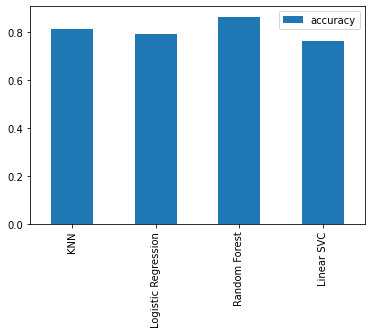

In [38]:
#Now my task is to do visualiazion
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

# Hyperparameter tuning and cross validation , Tuning by hand

In [39]:
#Finding the best parameters. We have to do that because we can find the best accuracy even though Random Forest looks the best one and Radom Forest is only 86%, which is not enough.
#We can do tune 3 ways 
#1 Tuning thru by hand
#2 Tuning thru Randomized Search Cv
#3 Tuning thru Grid Search Tv

In [40]:
train_scores = []

test_scores = []

neighbors=range(1,21)

knn=KNeighborsClassifier()

#Loop Through different Neighbors values

for i in neighbors:
  knn.set_params(n_neighbors=i)
  knn.fit(X_train, y_train)

  train_scores.append(knn.score(X_train, y_train))

  test_scores.append(knn.score(X_test, y_test))



In [41]:
train_scores

[1.0,
 0.8733091656747105,
 0.8802077697218915,
 0.8525051401363489,
 0.8555351152472677,
 0.8432799480575696,
 0.8464451899145115,
 0.8401688128990369,
 0.8411427334704036,
 0.8363542906611838,
 0.8377881181690293,
 0.8342711827724272,
 0.835759116978682,
 0.8315929012011687,
 0.831863434693215,
 0.8295639000108214,
 0.8305107672329834,
 0.8291580997727519,
 0.8294015799155936,
 0.8278865923601342]

In [42]:
test_scores

[0.7600086561350357,
 0.8068599870157974,
 0.794308591214023,
 0.8124864747890067,
 0.8110798528457044,
 0.816165332179182,
 0.8149751136117723,
 0.818112962562216,
 0.8198441895693572,
 0.8202769963211426,
 0.8211426098247133,
 0.8199523912573036,
 0.8217918199523913,
 0.8198441895693572,
 0.8204933996970353,
 0.8191949794416793,
 0.820709803072928,
 0.819735987881411,
 0.819735987881411,
 0.819735987881411]

maximum KNN Score on the test data set 82.17918199523912%


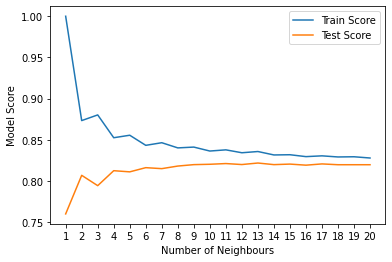

In [43]:
#Now we plot them to see the difference 

plt.plot(neighbors, train_scores,label="Train Score")
plt.plot(neighbors, test_scores,label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Model Score")
plt.legend()
print("maximum KNN Score on the test data set {}%".format(max(test_scores)*100))


# Tunining models with RandomizedSearch Cv

In [44]:
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}


rf_grid={"n_estimators": np.arange(10,1000,50),
         "max_depth":[None, 3, 5, 10],
         "min_samples_split": np.arange(2,20,2),
         "min_samples_leaf":np.arange(1, 20,2)}

In [45]:
np.random.seed(42)
rs_log_ref=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
rs_log_ref.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   30.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [46]:
rs_log_ref.best_params_

{'C': 206.913808111479, 'solver': 'liblinear'}

In [47]:
rs_log_ref.score(X_test, y_test)

0.7986366587318762

In [48]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [49]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 16.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [50]:
rs_rf.score(X_test, y_test)

0.862800259684051

# Tuning A Model with GridSearchCv 

In [51]:
np.random.seed(42)

log_reg_grid={"C": np.logspace(-4, 4, 20),
              "solver":["liblinear"]}

gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   28.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.6...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [52]:
gs_log_reg.best_params_

{'C': 206.913808111479, 'solver': 'liblinear'}

In [53]:
gs_log_reg.score(X_test, y_test)

0.7986366587318762

In [54]:
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3, 5, 10],
        "min_samples_split":np.arange(2, 20, 2),
        "min_samples_leaf":np.arange(1, 20, 2)}

np.random.seed(42)
gs_rf=GridSearchCV(RandomForestClassifier(),
                   param_grid=rf_grid,
                   cv=5,
                   verbose=True)
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
gs_rf.best_params_

# Evaluating a classification model, beyond Accuracy 

In [55]:
#Make Predictions on our test data 
y_preds=gs_log_reg.predict(X_test)

In [56]:
y_preds

array([0, 1, 1, ..., 0, 1, 0])

In [57]:
y_test

17815    0
11616    1
9562     1
12608    1
39527    1
        ..
7778     1
39381    0
26434    0
5134     1
22712    0
Name: CHURN_IND, Length: 9242, dtype: int64

# ROC Curve and Auc Scores / AUC=Area Under Curve and ROC=Receiver Operating Characteristic 


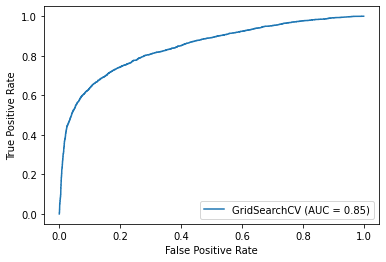

In [58]:
plot_roc_curve(gs_log_reg, X_test, y_test)

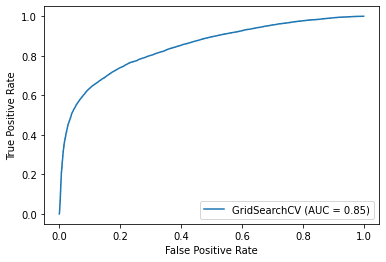

In [59]:
plot_roc_curve(gs_log_reg,X_train, y_train)

# Confusion Matrix

In [60]:
print(confusion_matrix(y_test, y_preds))

[[5133  554]
 [1307 2248]]


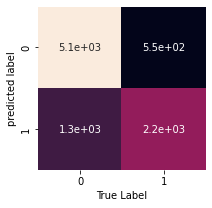

In [61]:
import seaborn as sns

def plot_conf_mat(y_test, y_preds):
  fig, ax = plt.subplots(figsize=(3, 3))
  ax= sns.heatmap(confusion_matrix(y_test, y_preds),
                  annot=True,
                  cbar=False)
  plt.xlabel("True Label")
  plt.ylabel("predicted label")

plot_conf_mat(y_test, y_preds)

# Classification Report

In [62]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      5687
           1       0.80      0.63      0.71      3555

    accuracy                           0.80      9242
   macro avg       0.80      0.77      0.78      9242
weighted avg       0.80      0.80      0.79      9242



In [63]:
gs_log_reg.best_params_

{'C': 206.913808111479, 'solver': 'liblinear'}

In [64]:
from sklearn.model_selection import cross_val_score
clf =  LogisticRegression(C=206.913808111479,
                          solver="liblinear")

In [66]:
cv_acc=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="accuracy")

In [67]:
cv_acc=np.mean(cv_acc)

In [69]:
cv_acc

0.7541457498398051

In [76]:
cv_precision=cross_val_score(clf,
                             X,
                             y,
                             cv=5,
                             scoring="precision")

In [78]:
cv_precision=np.mean(cv_precision)

In [79]:
cv_precision

0.8072923280558321

In [71]:
cv_recall=cross_val_score(clf,
                             X,
                             y,
                             cv=5,
                             scoring="recall")

cv_recall=np.mean(cv_recall)

cv_recall

0.6078133783024171

In [72]:
cv_recall

0.6078133783024171

In [73]:
cv_f1=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="f1")
cv_f1=np.mean(cv_f1)

cv_f1

0.5824318427785806

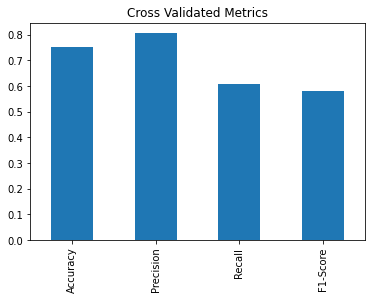

In [80]:
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision": cv_precision,
                         "Recall": cv_recall,
                         "F1-Score": cv_f1},
                        index=[0])
cv_metrics.T.plot.bar(title="Cross Validated Metrics", legend=False)

# Feature Importance

In [81]:
clf.fit(X_train, y_train)

LogisticRegression(C=206.913808111479, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
clf.coef_

array([[-4.43510048e-05, -5.17915162e-03,  6.39903634e-03,
         6.23644097e-03,  6.32353393e-03, -4.52558138e-03,
         6.75440865e-03,  8.56714581e-03,  1.61482902e-02,
        -1.06174874e-01,  3.03620635e-02,  4.74006272e-04,
        -2.37549394e-03,  3.64852958e-02,  1.13520018e-02,
         9.46572724e-03,  3.19425784e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -9.02720698e-07, -9.02720698e-07]])

In [83]:
feature_dict=dict(zip(df.columns, list(clf.coef_[0])))

In [84]:
feature_dict

{'ACCOUNT_TENURE': -0.005179151622218367,
 'ACCT_CNT_SERVICES': 0.006399036336293795,
 'AGE': 0.006236440974319034,
 'AGE_is_missing': 0.0,
 'BYO_PLAN_STATUS': 0.008567145813741189,
 'BYO_PLAN_STATUS_is_missing': 0.0,
 'CFU': 0.00632353393067298,
 'CFU_is_missing': 0.0,
 'CHURN_IND': 0.011352001752381581,
 'CONTRACT_STATUS': 0.0004740062724478319,
 'CONTRACT_STATUS_is_missing': 0.0,
 'COUNTRY_METRO_REGION': 0.03194257838897954,
 'COUNTRY_METRO_REGION_is_missing': -9.027206976680707e-07,
 'CUST_ID': -4.435100477524466e-05,
 'HANDSET_USED_BRAND': 0.03648529582419254,
 'HANDSET_USED_BRAND_is_missing': -9.027206976680707e-07,
 'LAST_FX_CONTRACT_DURATION': 0.030362063454137375,
 'MONTHLY_SPEND': 0.009465727237244558,
 'MONTHS_OF_CONTRACT_REMAINING': -0.10617487415833995,
 'PLAN_ACCESS_FEE': 0.006754408650181355,
 'PLAN_TENURE': 0.016148290207624254,
 'PREV_CONTRACT_DURATION': -0.002375493943371516,
 'SERVICE_TENURE': -0.004525581380703145,
 'STATE': 0.0}

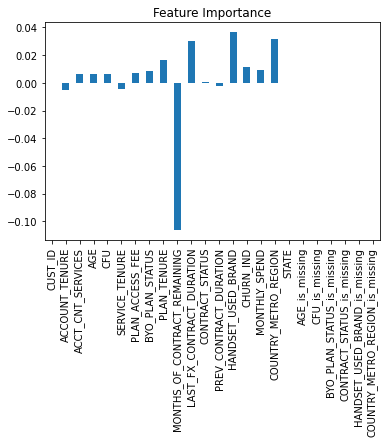

In [86]:
features_df=pd.DataFrame(feature_dict, index=[0])

features_df.T.plot.bar(title="Feature Importance", legend=False)

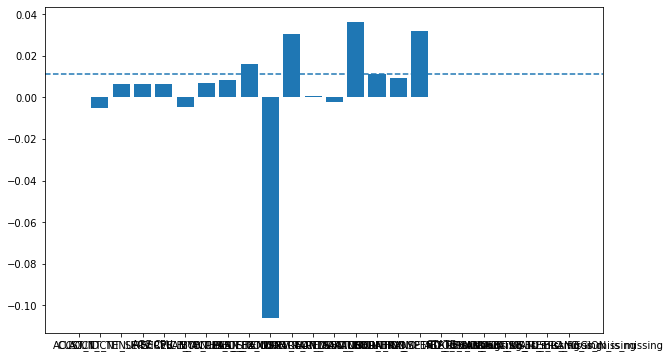

In [92]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(10,6))
ax.bar(feature_dict.keys(),feature_dict.values())

ax.axhline(features_df["CHURN_IND"].mean(),
           linestyle="--")